# Detecting the persistence in pseudo-icecore d18O records

In this tutorial, we detect the biological memory in the trees (using the TRW data) in PAGES2k.

In [1]:
%load_ext autoreload
%autoreload 2

import cfr
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
from statsmodels.tsa import stattools as st

import warnings
warnings.filterwarnings('ignore')

## Data preparation

### Proxy

In [5]:
df = pd.read_pickle('./data/pages2k_dataset.pkl')
pdb = cfr.ProxyDatabase().from_df(df).filter(by='ptype', keys=['ice.d18O'])

## Calculate the PACF for each site

In [6]:
pacf = {}
for pid, pobj in pdb.records.items():
    pacf[pid] = st.pacf(pobj.value, nlags=10)

In [7]:
for k, v in pacf.items():
    if v[1] > 0.9:
        print(k, v[1:4])

Ant_024 [ 0.92791961 -0.17295976 -0.1934938 ]
Arc_075 [ 0.97701768 -0.74067431  0.07945595]
Ant_007 [ 0.98807535 -0.69604455 -0.20231414]
Arc_033 [ 0.91521035 -0.32031824  0.00725874]
Ant_008 [ 0.92513629 -0.52340697 -0.10395528]


(0.0, 1.0)

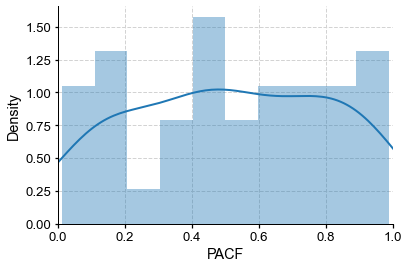

In [23]:
import seaborn as sns

pacf_list = []
for k, v in pacf.items():
    pacf_list.append(v[1])

ax = sns.distplot(pacf_list, bins=10)
ax.set_xlabel('PACF')
ax.set_xlim(0, 1)

In [8]:
pacf_lag = {}
pacf_lag[1] = []
pacf_lag[2] = []
pacf_lag[3] = []
lats = []
lons = []
for pid, pobj in pdb.records.items():
    pacf_tmp = st.pacf(pobj.value, nlags=10)
    pacf_lag[1].append(pacf_tmp[1])
    pacf_lag[2].append(pacf_tmp[2])
    pacf_lag[3].append(pacf_tmp[3])
    lats.append(pobj.lat)
    lons.append(pobj.lon)

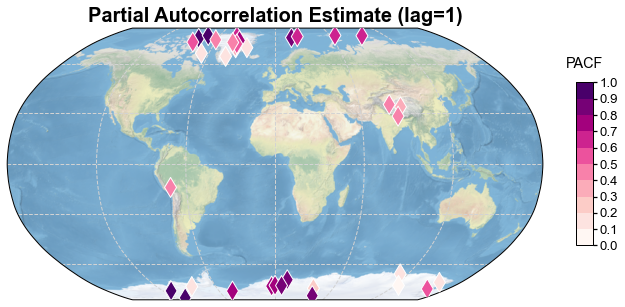

Figure saved at: "figs/ice.d18O.pacf_lag1.pdf"


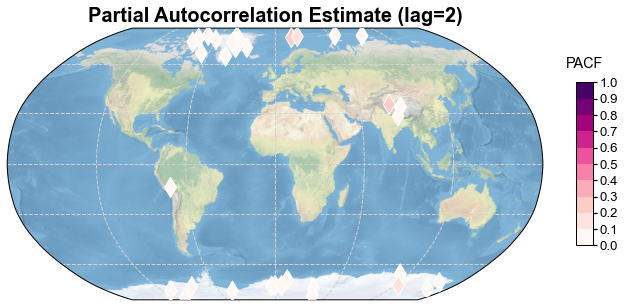

Figure saved at: "figs/ice.d18O.pacf_lag2.pdf"


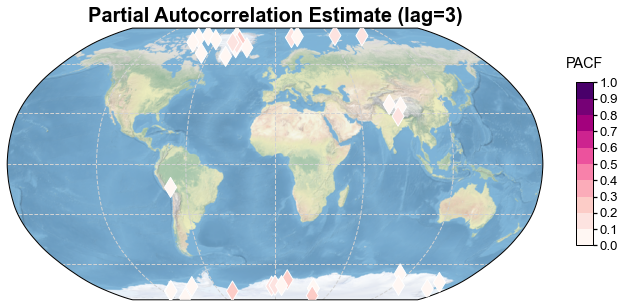

Figure saved at: "figs/ice.d18O.pacf_lag3.pdf"


In [10]:
levels = np.arange(0, 1.1, 0.1)
cbar_ticks = np.arange(0, 1.1, 0.1)
cbar_title = 'PACF'
cmap = 'RdPu'

for i in range(1, 4):
    fig, ax = cfr.visual.plot_scatter_map(
        pacf_lag[i], lats, lons, marker='d', title=f'Partial Autocorrelation Estimate (lag={i})',
        cbar_ticks=cbar_ticks,
        cbar_title=cbar_title,
        levels=levels,
        cmap=cmap,
    )
    cfr.showfig(fig)
    cfr.savefig(fig, f'./figs/ice.d18O.pacf_lag{i}.pdf')